In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

from scipy.special import erf
from scipy import stats


rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format

In [2]:
def get_chance(n_A, c_A ,n_B, c_B):
    '''
    A군과 B군의 샘플수(n)와 전환수(c)를 받습니다.
    (A군샘플, A군전환, B군샘플, B군전환)    
    실험결과를 반환합니다.
    {chance}의 확률로 {uplift}개선
    '''
    beta_A = stats.beta(c_A, n_A - c_A)
    beta_B = stats.beta(c_B, n_B - c_B)
    
    subs_std = np.sqrt(beta_A.var()+beta_B.var())
    subs_mean = beta_B.mean()-beta_A.mean()
    uplift = subs_mean/beta_A.mean()
    
    z = subs_mean/(subs_std*np.sqrt(2))
    erf_z = erf(z)
    chance = (1+erf_z)/2
    
    return chance, uplift

In [3]:
n_A = 1457
c_A = 246

n_B = 1266
c_B = 224

chance, uplift = get_chance(n_A,c_A,n_B,c_B)
print(f'실험 결과: {round(chance*100,1)}의 확률로 {round(uplift*100,1)}개선')

실험 결과: 71.1의 확률로 4.8개선


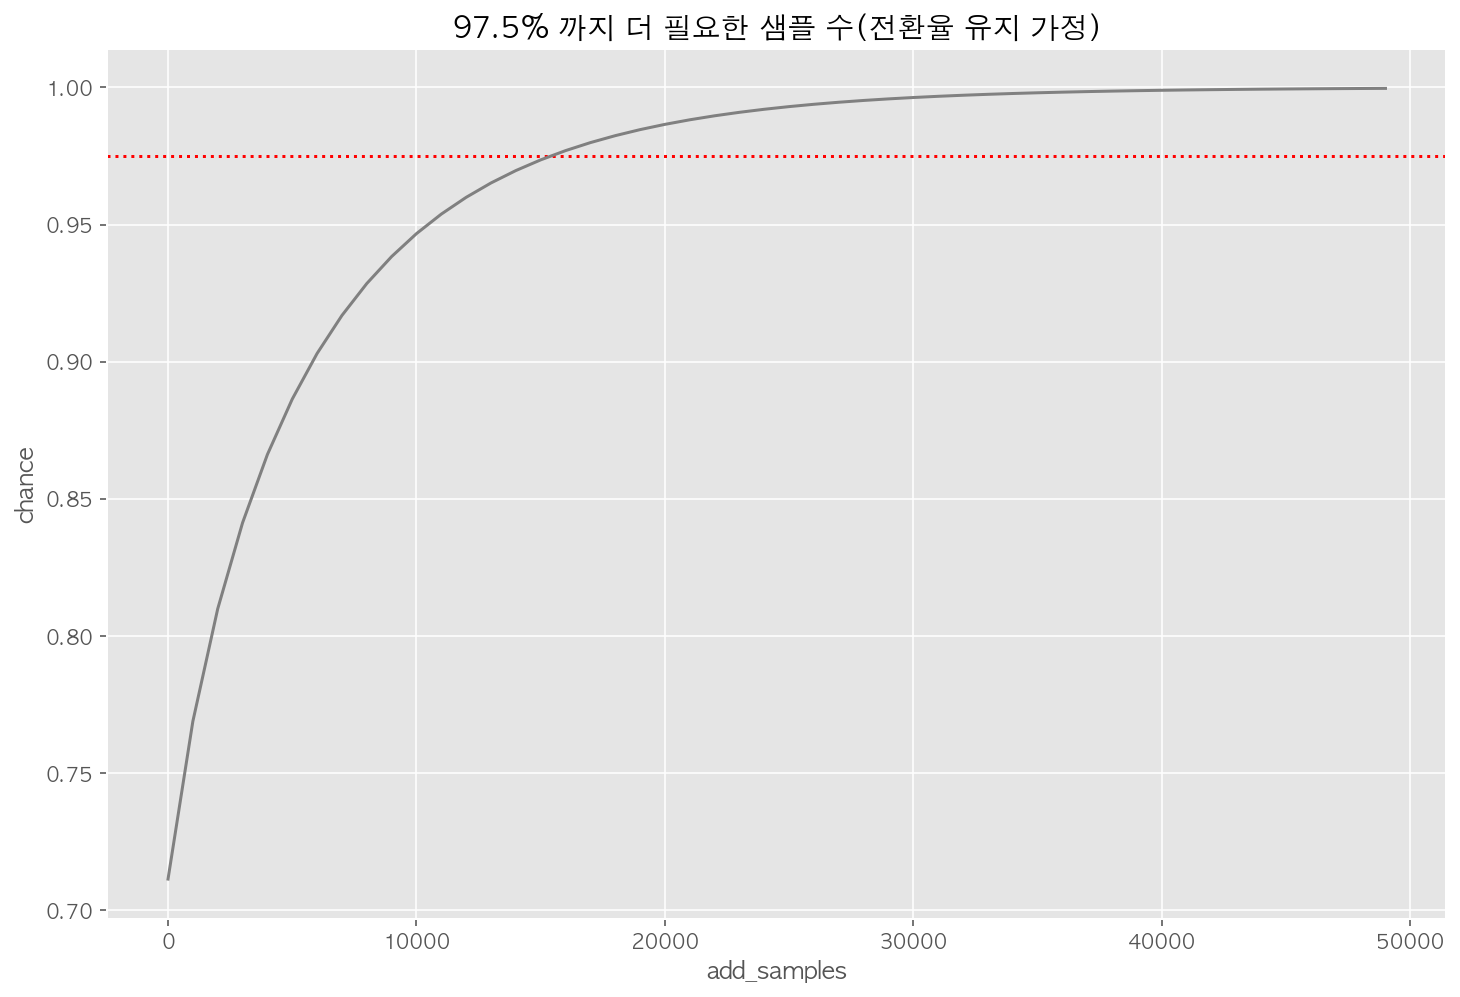

In [4]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

add_samples = pd.DataFrame()
p_B = c_B/n_B
p_A = c_A/n_A

for s in range(0,50000,1000):    
    n_B2 = n_B + s
    c_B2 = n_B2 * p_B
    n_A2 = n_A + s
    c_A2 = n_A2 * p_A
    
    chance, uplift = get_chance(n_A2, c_A2, n_B2, c_B2)
    add_samples.loc[s,'add_samples'] = s
    add_samples.loc[s,'chance'] = chance
    add_samples.loc[s,'uplift'] = uplift

plt.figure(figsize = (12,8))
plt.title('97.5% 까지 더 필요한 샘플 수(전환율 유지 가정)')
plt.axhline(0.975, ls = ':', color ='r')
ax = sns.lineplot(x = 'add_samples', y = 'chance', 
                  data = add_samples, color = 'gray')
